# MovieLens 100K Stable Benchmark Dataset
MovieLens 100K movie ratings. Stable benchmark dataset. 100,000 ratings from 1000 users on 1700 movies. Released 4/1998.
### Reason for using dataset
- Cleaner Data
- Contains user information which the 20M Dataset doesn't contain

### Details of Dataset
Link: https://files.grouplens.org/datasets/movielens/ml-100k.zip

### Analysis
Necessary Imports

In [2]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

### Defining Directories

In [6]:
dataset_Diretory="../Datasets/ml-100k"

## Read Data

In [9]:
# User Data
user_columns = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users_df = pd.read_csv(f'{dataset_Diretory}/u.user', sep='|', names=user_columns) 
users_df.head(2)


,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043


In [10]:
#Ratings
ratings_columns = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings_df = pd.read_csv(f'{dataset_Diretory}/u.data', sep='\t', names=ratings_columns)
ratings_df.drop( "unix_timestamp", inplace = True, axis = 1 ) 
ratings_df.head(2)

,user_id,movie_id,rating
0,196,242,3
1,186,302,3


In [11]:
#Ratings
ratings_columns = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings_df = pd.read_csv(f'{dataset_Diretory}/u.data', sep='\t', names=ratings_columns)
ratings_df.drop( "unix_timestamp", inplace = True, axis = 1 ) 
ratings_df.head(2)

,user_id,movie_id,rating
0,196,242,3
1,186,302,3


In [13]:
# Genre
genre_df = pd.read_csv(f'{dataset_Diretory}/u.genre', sep='|', encoding='latin-1')
genre_df.head(50)

,unknown,0
0,Action,1
1,Adventure,2
2,Animation,3
3,Children's,4
4,Comedy,5
5,Crime,6
6,Documentary,7
7,Drama,8
8,Fantasy,9
9,Film-Noir,10


In [15]:
# Movie
genre_columns = ["unknown"] + list(genre_df[genre_df.columns[0]].values)
movie_columns = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']
movies_df = pd.read_csv(f'{dataset_Diretory}/u.item', sep='|', names=movie_columns+genre_columns,
                     encoding='latin-1')
movies_df.head()

,movie_id,title,release_date,video_release_date,imdb_url,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [16]:
# Cleaning timestamp from titles
def clean_title(title):
    return re.sub("[\(\[].*?[\)\]]", "",title)

movies_df['title'] = movies_df['title'].apply(clean_title)
movies_df['title'] = movies_df['title'].str.strip()

movies_df.head()

<>:3: SyntaxWarning: invalid escape sequence '\('
<>:3: SyntaxWarning: invalid escape sequence '\('
C:\Users\matur\AppData\Local\Temp\ipykernel_19612\4281866862.py:3: SyntaxWarning: invalid escape sequence '\('
  return re.sub("[\(\[].*?[\)\]]", "",title)


,movie_id,title,release_date,video_release_date,imdb_url,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


## Validation of stated statistics


In [17]:
print("Users: ", users_df.user_id.nunique())
print("Movies: ", movies_df.movie_id.nunique())
print("Movies with ratings: ",ratings_df.movie_id.nunique())
print("Users with ratings: ",ratings_df.user_id.nunique())
print("Ratings: ",ratings_df.shape[0])

Users:  943
Movies:  1682
Movies with ratings:  1682
Users with ratings:  943
Ratings:  100000


## Distributions and insights


Sex distribution of users

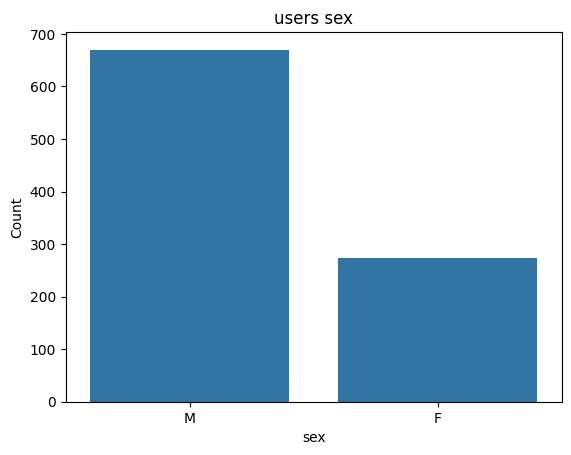

In [18]:

sns.countplot(data=users_df, x='sex')
plt.title('users sex')
plt.xlabel('sex')
plt.ylabel('Count')
plt.show()

Age Distribution

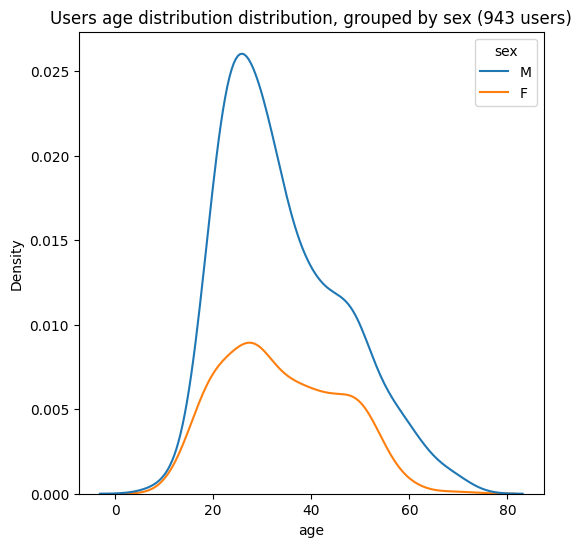

In [19]:
f, ax = plt.subplots(1,1, figsize=(6, 6))
plt.title("Users age distribution distribution, grouped by sex (943 users)")
sns.kdeplot(data=users_df, x="age", hue="sex", levels=20)
plt.show()

Occupation Distribution

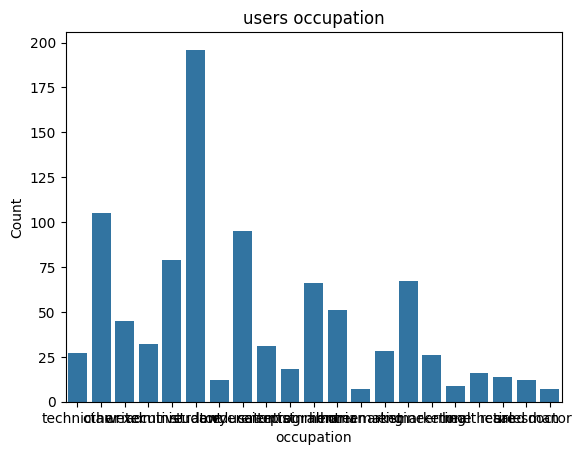

In [20]:
sns.countplot(data=users_df, x='occupation',)
plt.title('users occupation')
plt.xlabel('occupation')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()